In [0]:
# Change directory to VSCode workspace root so that relative path loads work correctly. Turn this addition off with the DataScience.changeDirOnImportExport setting
import os
try:
	os.chdir(os.path.join(os.getcwd(), '..'))
	print(os.getcwd())
except:
	pass


 # [作業目標]
 - 使用 Day 12 剛學到的方法, 對較完整的資料生成離散化特徵
 - 觀察上述離散化特徵, 對於目標值的預測有沒有幫助

 # [作業重點]
 - 仿照 Day 12 的語法, 將年齡資料 ('DAYS_BIRTH' 除以 365) 離散化
 - 繪製上述的 "離散化標籤" 與目標值 ('TARGET') 的長條圖

In [2]:
# 載入需要的套件
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
get_ipython().magic('matplotlib inline')

# 設定 data_path
dir_data = './data/'

import warnings
warnings.filterwarnings('ignore')


In [3]:
# 讀取資料檔
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)
app_train.shape


(307511, 122)

In [4]:
# 將只有兩種值的類別型欄位, 做 Label Encoder, 計算相關係數時讓這些欄位可以被包含在內
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# 檢查每一個 column
for col in app_train:
    if app_train[col].dtype == 'object':
        # 如果只有兩種值的類別型欄位
        if len(list(app_train[col].unique())) <= 2:
            # 就做 Label Encoder, 以加入相關係數檢查
            app_train[col] = le.fit_transform(app_train[col])            
print(app_train.shape)


(307511, 122)


 ## 練習時間
 參考 Day 12 範例程式，離散化你覺得有興趣的欄位，並嘗試找出有趣的訊息

In [5]:
# 出生日數 (DAYS_BIRTH) 取絕對值 
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])

# 根據年齡分成不同組別 (年齡區間 - 還款與否)
age_data = app_train[['TARGET', 'DAYS_BIRTH']] # subset
age_data['YEARS_BIRTH'] = age_data['DAYS_BIRTH'] / 365 # day-age to year-age


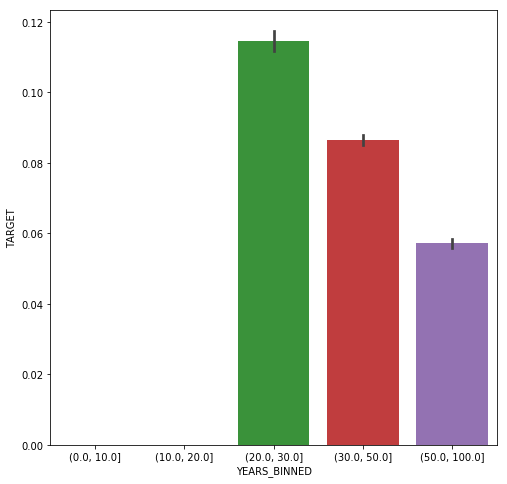

In [6]:
bin_cut = np.array([0.,10., 20., 30., 50., 100.,])
age_data['YEARS_BINNED'] = pd.cut(age_data["YEARS_BIRTH"], bins = bin_cut) 

plt.figure(figsize = (8, 8))
px = 'YEARS_BINNED'
py = 'TARGET'
sns.barplot(px, py, data=age_data)

